# Data Driven Dealings Development


*   **EDA on Sales Data**
*   Feature Engineering and Clustering
*   Predicting Sales
*   Market Basket
*   Recommending Items per Customer







# EDA on Sales Data

*   Import Data
*   Checking the Dataframe: Datatypes, NaN Values
*   Visually inspecting distribution and shape
*   Visually inspecting time series: Outliers, Uncommon Datapoints?
*   Descriptive Statistics for Time Series




## Read the Data

In [1]:
# Comments start with a # and are higlighted in green.
# To be able to access our data stored in our Google Drive, we first need to mount our Google Drive so we can load and save files to it. 
from google.colab import drive
drive.mount('/content/gdrive')
#We'll need to put in a token which Google will generate for us as soon as we click on the link.

Mounted at /content/gdrive


In [2]:
# Import the excel file into a pandas dataframe.
import pandas as pd
data = pd.read_excel('/content/gdrive/My Drive/DDDDFolder/DDDD.xlsx')
# Take a first glance at the DataFrame using head.
data.head()

SalesDate  SalesValue  SalesAmount  Customer  SalesTransactionID  SalesItem
0 2018-09-28      8280.0           10         0                   0          0
1 2018-09-28      7452.0           10         0                   0          0
2 2019-04-23     21114.0           30         0                   1          0
3 2019-04-23      7038.0           10         0                   1          1
4 2019-04-23      7000.0            2         0                   1          2

In [3]:
# # Just in case your data needs a little bit of preparation, I have attached some very frequently used data massaging functions
# # Let`s assume you want to rename the column header SalesValue into Net Sales and SalesTransactionID into Transaction
# data=data.rename(columns={'SalesValue': 'Net Sales', 'SalesTransactionID': 'Transaction'})

# # If you want to concatenate two columns, separated by -&- you could do so like that
# data["SalesItemCustomer"] = data["SalesItem"] +'-&-'+ data["Customer"]
# And in case you want to separate the column SalesItemCustomer again into two columns, -&- as the separator, use the split function wiht n =1, if you want to split into two columns
# new = data["SalesItemCustomer"].str.split("'-&-", n = 1, expand = True) 
# # Making separate SalesItemSEp column from new data frame 
# data["SalesItemSEp"]= new[0] 
# # Making separate CustomerSep column from new data frame 
# data["CustomerSep"]= new[1] 

## Exploratory Data Analysis and Descriptive Statistics

In [4]:
# As we can see from the above data.head we have six columns. The len function would do the same for us.
print(len(data.columns))

# Just using len() on our dataframe will tell us the amount of rows.
print(len(data))

#result: six columns in total where: a Customer buys a SalesItem on a specific SalesDate. Depending on the SalesAmount (Quantity the SalesItems is purchased) the SalesValue (e.g. in €) will vary. 
#Sometimes the customer buys more than one SalesItem at once (in one SalesTransactionID).
#the corresponding features.


6
341422


In [5]:
#Instead of using len two times we can also achieve the same result using shape.
data.shape

(341422, 6)

In [6]:
# Check if there are any missing inputs (NaN stands for Not a Number)
print(data.isnull().any(axis=1).sum(), ' / ', len(data))

0  /  341422


In [7]:
# We can add text to our print function for better readability.
print('We have got',data.isnull().any(axis=1).sum(), 'Null values out of', len(data), 'rows.')

We have got 0 Null values out of 341422 rows.


In [8]:
# SalesDate looks like a Date data type, but let`s really make sure using dtypes function.
print(data.dtypes)

SalesDate             datetime64[ns]
SalesValue                   float64
SalesAmount                    int64
Customer                       int64
SalesTransactionID             int64
SalesItem                      int64
dtype: object


SalesDate is Datetime as expected. But maybe it looks a little uncommon to you that Customer is int (integer, instead of a customer name string (str)). The reason for using a whole number (int) is, it is used as a primary key. We will see how to map it back to customer names later on.

In [9]:
# info() even adds informartion about non-null to the above used dtypes() function, so we do not need to use isnull separately.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341422 entries, 0 to 341421
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   SalesDate           341422 non-null  datetime64[ns]
 1   SalesValue          341422 non-null  float64       
 2   SalesAmount         341422 non-null  int64         
 3   Customer            341422 non-null  int64         
 4   SalesTransactionID  341422 non-null  int64         
 5   SalesItem           341422 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 15.6 MB


In [10]:
# Let us get a first insight into our timeframe
data['SalesDate'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                  341422
unique                   1008
top       2018-02-20 00:00:00
freq                      927
first     2016-05-02 00:00:00
last      2020-01-31 00:00:00
Name: SalesDate, dtype: object

In [11]:
# This is also a key lesson we just learned: we should read any messages (like FutureWarning as above) Python is throwing at us carefully. 
# We will act accordingly for the sake of getting rid of this message.
data['SalesDate'].describe(datetime_is_numeric=True)


count                           341422
mean     2018-02-01 13:10:30.138641152
min                2016-05-02 00:00:00
25%                2017-02-14 00:00:00
50%                2018-01-02 00:00:00
75%                2019-01-08 00:00:00
max                2020-01-31 00:00:00
Name: SalesDate, dtype: object

Count is just the number of datasets (since we do not have any NaN values). There is no use in calculating the mean for days. But with the Min, Max and Percentiles we can already get a glimpse of the date`s distribution. Because we are looking at DateTime field it is more helpful to visually inspect this time line on SalesAmount later on.

In [12]:
data['SalesAmount'].describe()

count    341422.000000
mean          8.208209
std          35.476935
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        2110.000000
Name: SalesAmount, dtype: float64

Similar to SalesDate also SalesAmount can be better inspected visually than only using describe function.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Sales Quantity')

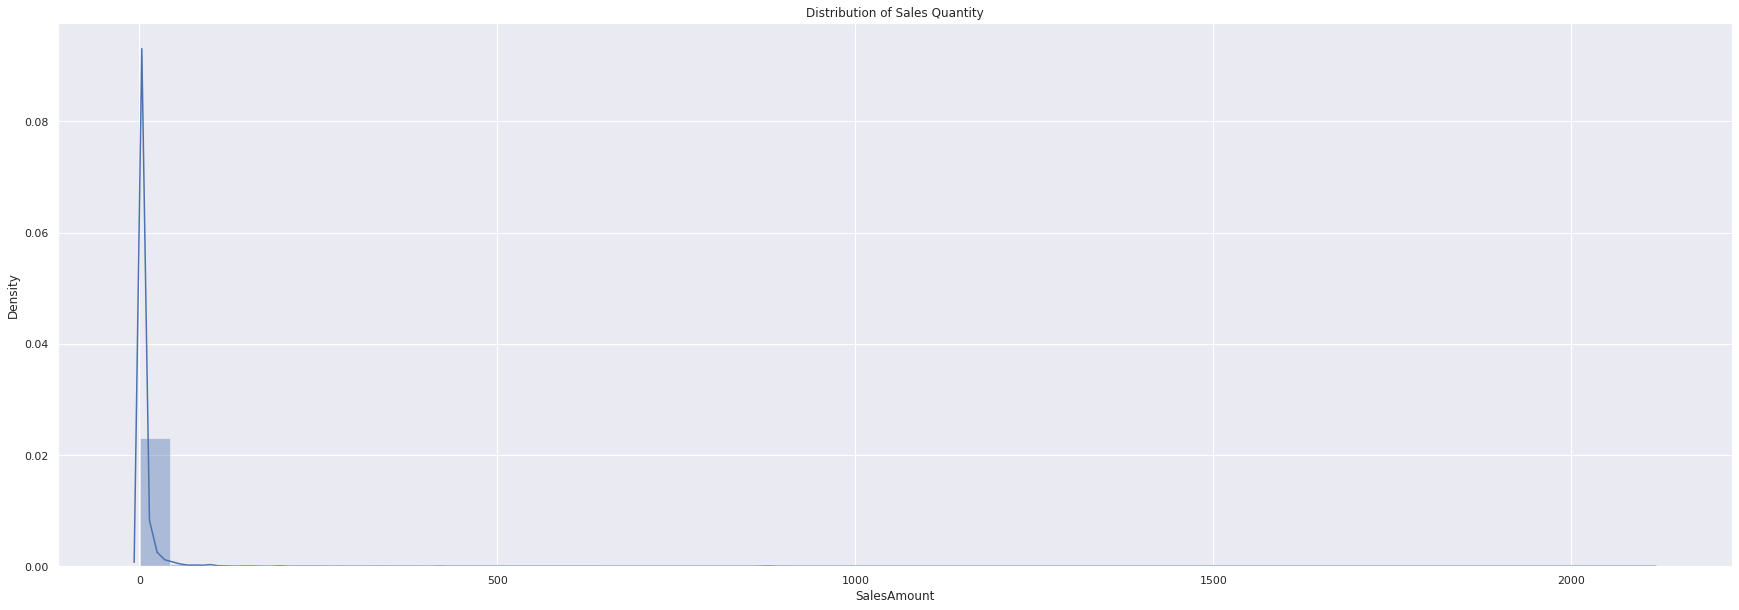

In [13]:
#plotting to see distribution and find outliers visually
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(30,10)})
sns.distplot(data.SalesAmount.dropna())
plt.title('Distribution of Sales Quantity')




In [14]:
#doing the same, but this time dynamically to improve data understanding (plotly histogram vs statis seaborn)

import plotly.offline as pyoff
import plotly.graph_objs as go

plot_data = [
    go.Histogram(
        x=data['SalesAmount']
    )
]

plot_layout = go.Layout(
        title='SalesAmount'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)
# using plotly we can now mouse over the bars to see the values. We can even zoom into our visualization for better scalability.

In [15]:
# using skewness and kurtosis as a statistical add to the above histogram to the shape of the distribution
print("Skewness: %f" % data['SalesAmount'].skew())
print("Kurtosis: %f" % data['SalesAmount'].kurt())

Skewness: 18.073516
Kurtosis: 440.674856


The value of the skewness is positive, because the tail of the distribution is longer towards the right hand side of the curve. It is not symmetrically distributed. Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. 

In [16]:
#just for the fun of it -and for learning purposes- we can achieve the same result if we add the function to a variable name (case sensitive!)
SkewValue = data.skew()
print("SkewValue of dataframe attributes: ", SkewValue)

SkewValue of dataframe attributes:  SalesValue            15.466199
SalesAmount           18.073516
Customer              -1.469180
SalesTransactionID     1.885978
SalesItem              1.452359
dtype: float64


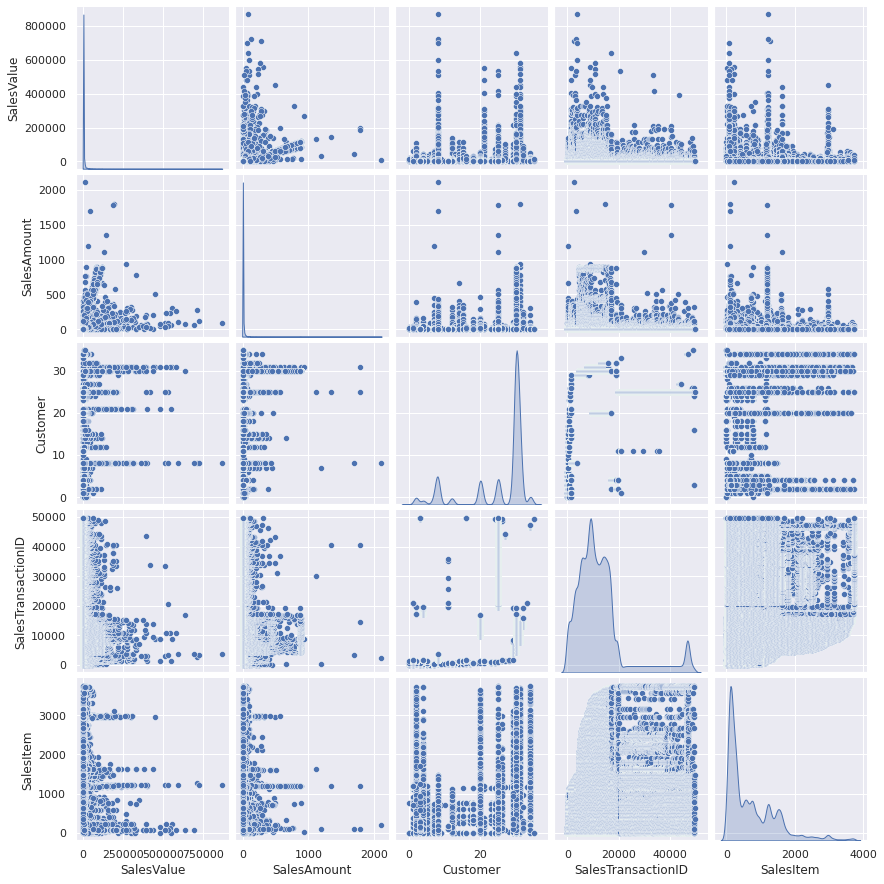

In [17]:
# For a quick general overview for any possible correlation we can also use Seaborn`s pairplot function. Please note, that there is no sense in plotting the keys for Customer, SalesTransactionID and SalesItems. We just do it to see how it would look like.
sns.pairplot(data, diag_kind="kde")
# diag_kind: Kind of plot for the diagonal subplots, kde: kernel density estimate


## Pandas Profiling

In [18]:
# #The autoreload instruction reloads modules automatically before code execution, which is helpful for the update below.
# %load_ext autoreload
# %autoreload 2

In [19]:
# #Make sure that we have the latest version of pandas-profiling.
# import sys
# !{sys.executable} -m pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

In [20]:
# #from pathlib import Path
# this takes long time!
# import requests
# import numpy as np
# import pandas as pd

# import pandas_profiling
# #this will take some time
# #from pandas_profiling.utils.cache import cache_file

In [21]:
# #Inline report without saving object
# report = data.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
# report

In [22]:
##Save report to file
# profile_report = data.profile_report(html={'style': {'full_width': True}})
# profile_report.to_file("/DataProfiling.html")

In [23]:
# #to export your PandasProfiling Report as html in your local Jupyter Notebook
# df = pd.read_excel('DDDD.xlsx').profile_report()
# df.to_file("DataProfiling.html")

## Checking for unusual values within the time series

In [24]:
!pip install plotly_express
#import plotly_express as px

In [25]:
import plotly_express as px


In [26]:
# Let us group the daily sum for all customers and SalesItems.
DailySalesSum=data.resample('D', on='SalesDate').sum() #group on a daily 'D' basis; 
# Notice that SalesDate is not a column any longer, but now an index, due to grouping on SalesDate level
DailySalesSum.head()
# Please note that the sum of Customers, SalesTransactionID, and SalesItem does not make any sense here, because it only sums all our Customer codes. But we are just interested in SalesValue or SalesAmount per SalesDay, see next cell.

SalesValue  SalesAmount  Customer  SalesTransactionID  SalesItem
SalesDate                                                                   
2016-05-02   676484.17         3623     14241             8472690     361020
2016-05-03   411892.57         1910      7243             5582178     170648
2016-05-04  3112075.11         4758     11305             6641265     295923
2016-05-05   349020.52         1004      8294             4513983     266972
2016-05-06  1723892.93         2965     11290             8665817     354422

In [27]:
fig = px.line(DailySalesSum,  y="SalesAmount")
# above we missed to call the x axis, that is why the index has been used. Time series is per definition ordered.  
fig.show(renderer="colab")

In [28]:
# we need to reset the index after resampling
DailySalesSum = DailySalesSum.reset_index()
DailySalesSum.head()

SalesDate  SalesValue  SalesAmount  Customer  SalesTransactionID  SalesItem
0 2016-05-02   676484.17         3623     14241             8472690     361020
1 2016-05-03   411892.57         1910      7243             5582178     170648
2 2016-05-04  3112075.11         4758     11305             6641265     295923
3 2016-05-05   349020.52         1004      8294             4513983     266972
4 2016-05-06  1723892.93         2965     11290             8665817     354422

In [29]:
MonthlySalesSum=data.resample('M', on='SalesDate').sum() # M stands for Month End, in contrast to MS-Month Start
MonthlySalesSum = MonthlySalesSum.reset_index()
MonthlySalesSum.head()

SalesDate   SalesValue  SalesAmount  Customer  SalesTransactionID  SalesItem
0 2016-05-31  20166177.78        51265    219003           147309836    5878767
1 2016-06-30  20092795.13        56692    236608           164558983    6267283
2 2016-07-31  19127473.54        53954    234838           181719685    6182682
3 2016-08-31  19677492.02        55496    246380           181872656    6316045
4 2016-09-30  19663361.67        53552    230070           169774628    6271814

In [30]:
# fig = px.line(MonthlySalesSum, x='SalesDate', y="SalesAmount")
# fig.show(renderer="colab")

In [31]:
YearSalesSum=data.resample('Y', on='SalesDate').sum()
YearSalesSum = YearSalesSum.reset_index()
YearSalesSum.head()
# fig = px.line(YearSalesSum, x='SalesDate', y="SalesAmount")
# fig.show(renderer="colab")

SalesDate    SalesValue  ...  SalesTransactionID  SalesItem
0 2016-12-31  1.606656e+08  ...          1383465528   51351050
1 2017-12-31  2.633926e+08  ...          1392947603   67254107
2 2018-12-31  2.754881e+08  ...           886671545   60199985
3 2019-12-31  2.892353e+08  ...           651042017   59829983
4 2020-12-31  2.516677e+07  ...            54579573    5694588

[5 rows x 6 columns]

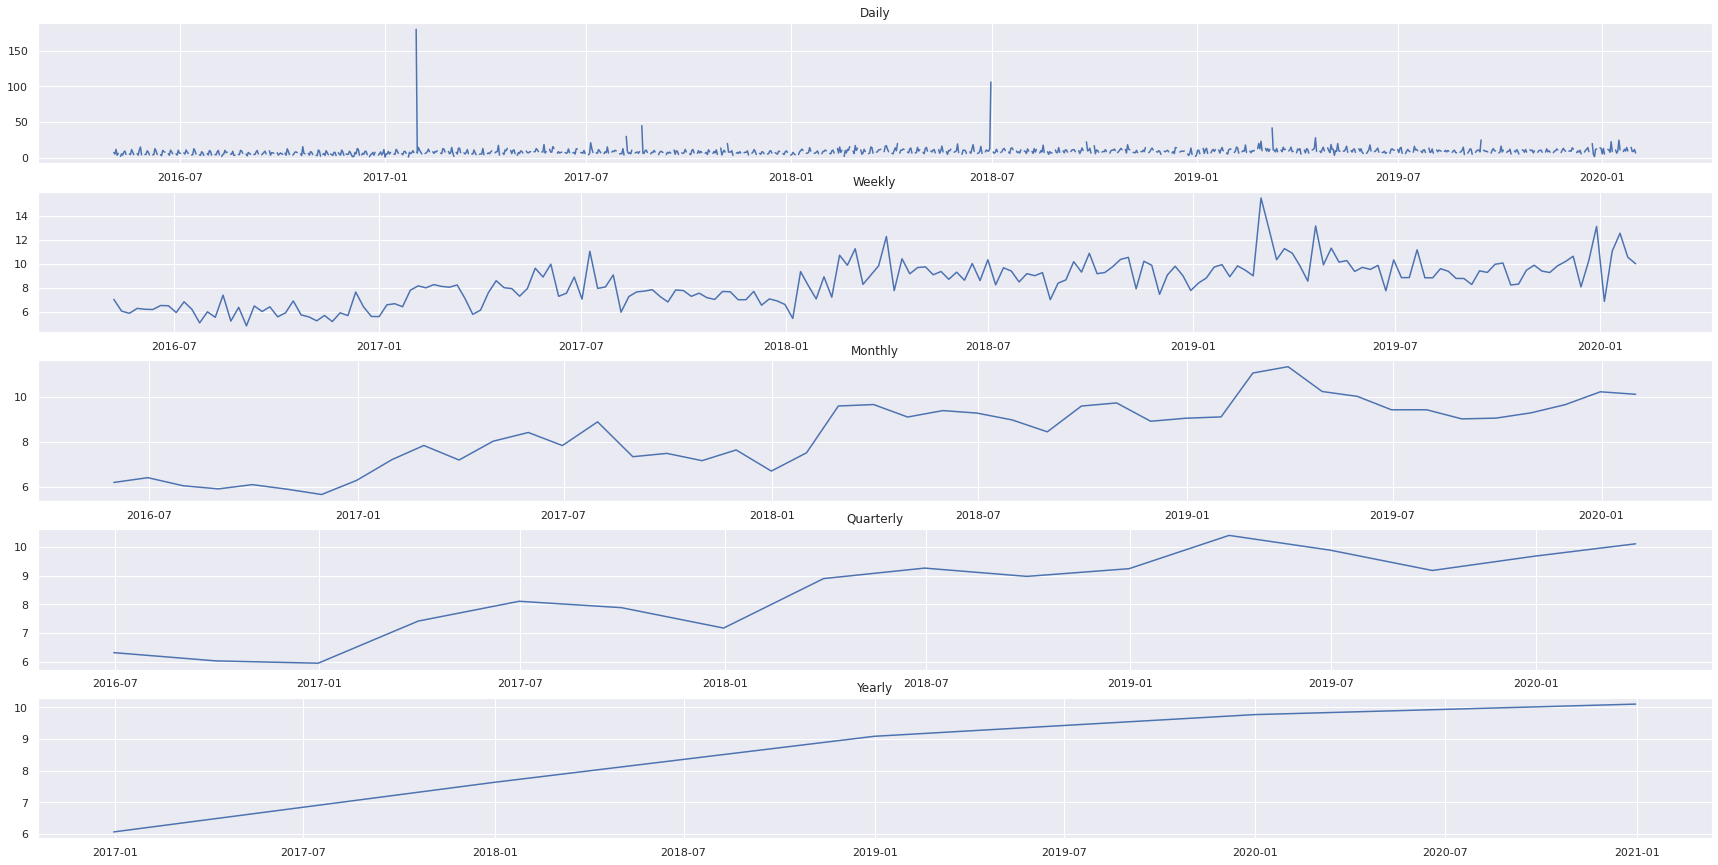

In [32]:
# Instead of the above cells, we can also do it all in one cell via creating one DF for grouping on time series
TimeSeriesGroup = data.set_index('SalesDate')
TimeSeriesGroup=TimeSeriesGroup.drop(columns=[ 'SalesValue','Customer','SalesTransactionID','SalesItem'])
#TimeSeriesGroup = TimeSeriesGroup.resample('d').mean() 

# This time we will calculate the mean (insted of sums) and then plot five diagrams.
# I would always stick to summing our sales amount instead of averaging. Using average will result in loss of information. But for learning purpose we will give mean a try here. And we can also see that average smoothens our data, which can be a very supportive thing.
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,figsize=(30,15))

# note that all days in between our time series get plotted, even if no sales exist. That's the reason for the many 0 values.
ax1.plot(TimeSeriesGroup['SalesAmount'].resample('D').mean())
ax1.set_title('Daily');

ax2.plot(TimeSeriesGroup['SalesAmount'].resample('W').mean())
ax2.set_title('Weekly');

ax3.plot(TimeSeriesGroup['SalesAmount'].resample('M').mean())
ax3.set_title('Monthly');

ax4.plot(TimeSeriesGroup['SalesAmount'].resample('Q').mean())
ax4.set_title('Quarterly');

ax5.plot(TimeSeriesGroup['SalesAmount'].resample('A').mean())
ax5.set_title('Yearly');
# Daily data has at least two extreme outliers. Remember that average values are highly influenced by outliers.
# Scale gets much clearer looking the weekly averages.
# Looking from monthly over quarterly to yearly average we can clearly see the overall rising trend.

Remember when we talked shortly about SPC in chapter 1? Having a look at the weekly mean and standard deviation we can see how the location and variances change over time.

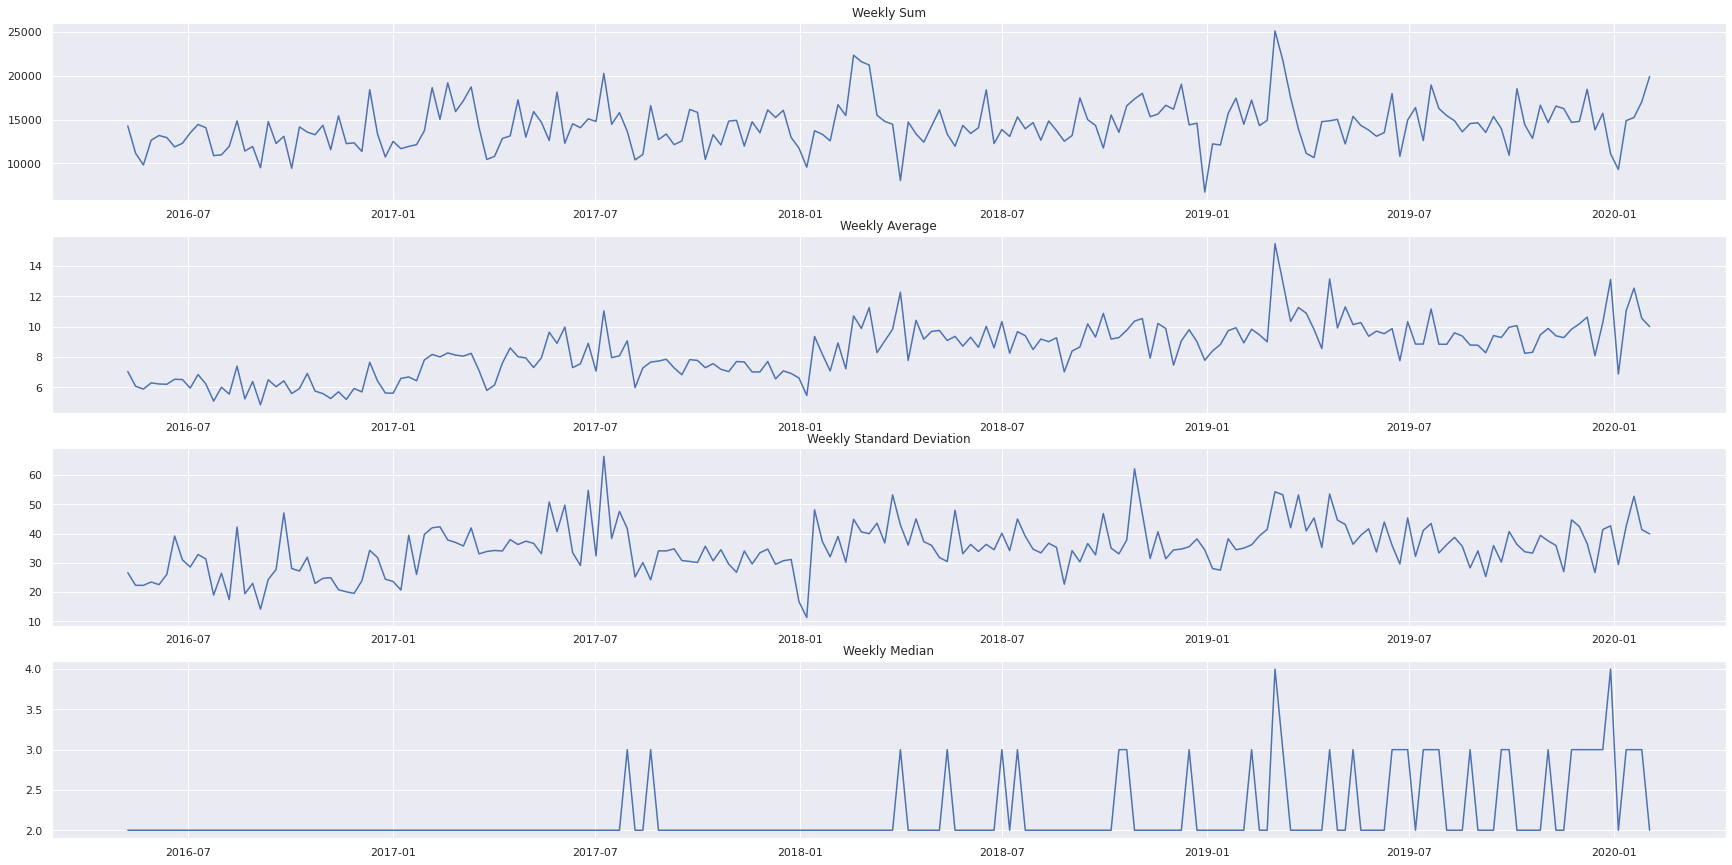

In [33]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,figsize=(30,15))

ax1.plot(TimeSeriesGroup['SalesAmount'].resample('W').sum())
ax1.set_title('Weekly Sum');

ax2.plot(TimeSeriesGroup['SalesAmount'].resample('W').mean())
ax2.set_title('Weekly Average');

ax3.plot(TimeSeriesGroup['SalesAmount'].resample('W').std())
ax3.set_title('Weekly Standard Deviation');

ax4.plot(TimeSeriesGroup['SalesAmount'].resample('W').median())
ax4.set_title('Weekly Median');

In [34]:
#Anomaly Detection: spotting unusual datapoints
AnomalyTimeSeries = data.set_index('SalesDate')
AnomalyTimeSeries=AnomalyTimeSeries.drop(columns=[ 'SalesValue','Customer','SalesTransactionID','SalesItem'])
AnomalyTimeSeries = AnomalyTimeSeries.resample('MS').sum() # grouping SalesAmount on a monthly basis, for each Month Start 'MS'
# in case you want to resample (group) not on a yearly or weekly level instead
#AnomalyTimeSeries = AnomalyTimeSeries.resample('W').sum() # weekly level
#AnomalyTimeSeries = AnomalyTimeSeries.resample('AS').sum() #yearly level
AnomalyTimeSeries.head()

SalesAmount
SalesDate              
2016-05-01        51265
2016-06-01        56692
2016-07-01        53954
2016-08-01        55496
2016-09-01        53552

In [35]:
#Extracting Year and Month out of our Day-Date, for spotting any monthly or yearly patterns
data['Year']= pd.DatetimeIndex(data['SalesDate']).year
# the above code means that we are extracting the year out of our column SalesDate and add that year into a new column Year into the same dataframe data.
data['Month']= pd.DatetimeIndex(data['SalesDate']).month
data['Weekday']= pd.DatetimeIndex(data['SalesDate']).weekday
data['Quarter']= pd.DatetimeIndex(data['SalesDate']).quarter
data['Week']= pd.DatetimeIndex(data['SalesDate']).week
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



SalesDate  SalesValue  SalesAmount  Customer  ...  Month  Weekday  Quarter  Week
0 2018-09-28      8280.0           10         0  ...      9        4        3    39
1 2018-09-28      7452.0           10         0  ...      9        4        3    39
2 2019-04-23     21114.0           30         0  ...      4        1        2    17
3 2019-04-23      7038.0           10         0  ...      4        1        2    17
4 2019-04-23      7000.0            2         0  ...      4        1        2    17

[5 rows x 11 columns]

In [36]:
data.groupby(['Weekday']).sum()

SalesValue  SalesAmount  Customer  ...   Month  Quarter     Week
Weekday                                       ...                          
0        1.834748e+08       484374   1823069  ...  432782   166290  1783050
1        2.159437e+08       620011   2074206  ...  606331   233169  2491626
2        1.992272e+08       588323   1581308  ...  418284   159645  1715928
3        1.767298e+08       525547   1488126  ...  342252   129997  1394921
4        2.317245e+08       572365   1635080  ...  515561   197564  2081194
5        4.339796e+05          746       458  ...     258       93     1059
6        6.414211e+06        11097     36113  ...   12531     4439    51375

[7 rows x 9 columns]

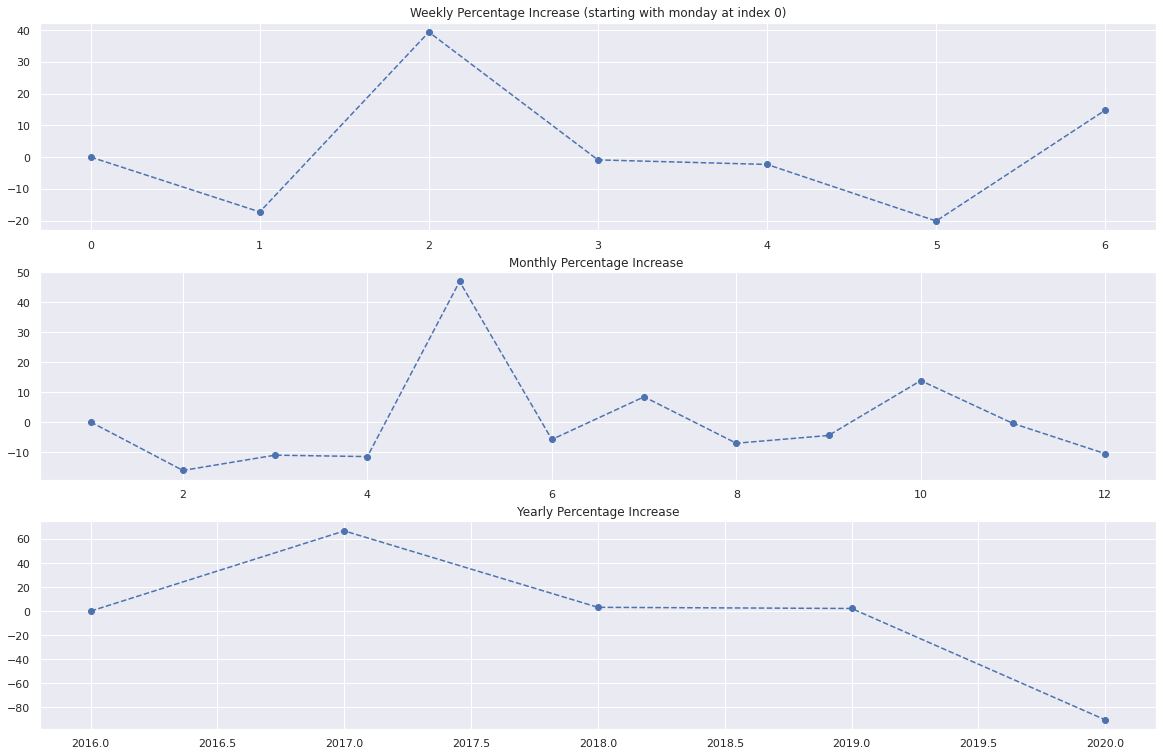

In [37]:
AnomalyTimeSeriesDoW=AnomalyTimeSeries.groupby(AnomalyTimeSeries.index.dayofweek).sum().reset_index().rename(columns={"SalesDate": "Day", "SalesAmount": "SalesAmountSum"})
AnomalyTimeSeriesDoW.set_index("Day", drop=True, inplace=True)

AnomalyTimeSeriesMonth=AnomalyTimeSeries.groupby(AnomalyTimeSeries.index.month).sum().reset_index().rename(columns={"SalesDate": "Month", "SalesAmount": "SalesAmountSum"})
AnomalyTimeSeriesMonth.set_index("Month", drop=True, inplace=True)

AnomalyTimeSeriesYear=AnomalyTimeSeries.groupby(AnomalyTimeSeries.index.year).sum().reset_index().rename(columns={"SalesDate": "Year", "SalesAmount": "SalesAmountSum"})
AnomalyTimeSeriesYear.set_index("Year", drop=True, inplace=True)

AnomalyTimeSeriesDoW['PercentageIncrease']=(AnomalyTimeSeriesDoW.pct_change().fillna(0))*100
AnomalyTimeSeriesMonth['PercentageIncrease']=AnomalyTimeSeriesMonth.pct_change().fillna(0)*100
AnomalyTimeSeriesYear['PercentageIncrease']=AnomalyTimeSeriesYear.pct_change().fillna(0)*100

fig, (ax1, ax2,ax3) = plt.subplots(3,figsize=(20,13))
ax1.plot(AnomalyTimeSeriesDoW.PercentageIncrease,marker='o', linestyle='--')
ax1.set_title('Weekly Percentage Increase (starting with monday at index 0)');
ax2.plot(AnomalyTimeSeriesMonth.PercentageIncrease,marker='o', linestyle='--')
ax2.set_title('Monthly Percentage Increase ');
ax3.plot(AnomalyTimeSeriesYear.PercentageIncrease,marker='o', linestyle='--')
ax3.set_title('Yearly Percentage Increase');

In [38]:
AnomalyTimeSeriesDoW
# from Monday to Tuesday: (391837-324108)/391837 =17% (decrease)

SalesAmountSum  PercentageIncrease
Day                                    
0            391837            0.000000
1            324108          -17.284994
2            451723           39.374221
3            447677           -0.895682
4            437262           -2.326454
5            349139          -20.153363
6            400717           14.772913

In [39]:
# #quite resource intensive!
# #Better than a histogram, you can spot the overall distribution regarding Min, Max, Mean/Median, Standard Deviatin using a Box Plot or Violin Graph
# fig=px.violin(data, x="Year", y="SalesAmount",box=True, points='all') # Replace Year by Month, or Weekday (Monday starts with 0), Quarter if you want to see overall monthly distribution
# #simply pass "colab" as the value for the parameter renderer in fig.show(renderer="colab")
# fig.show(renderer="colab")

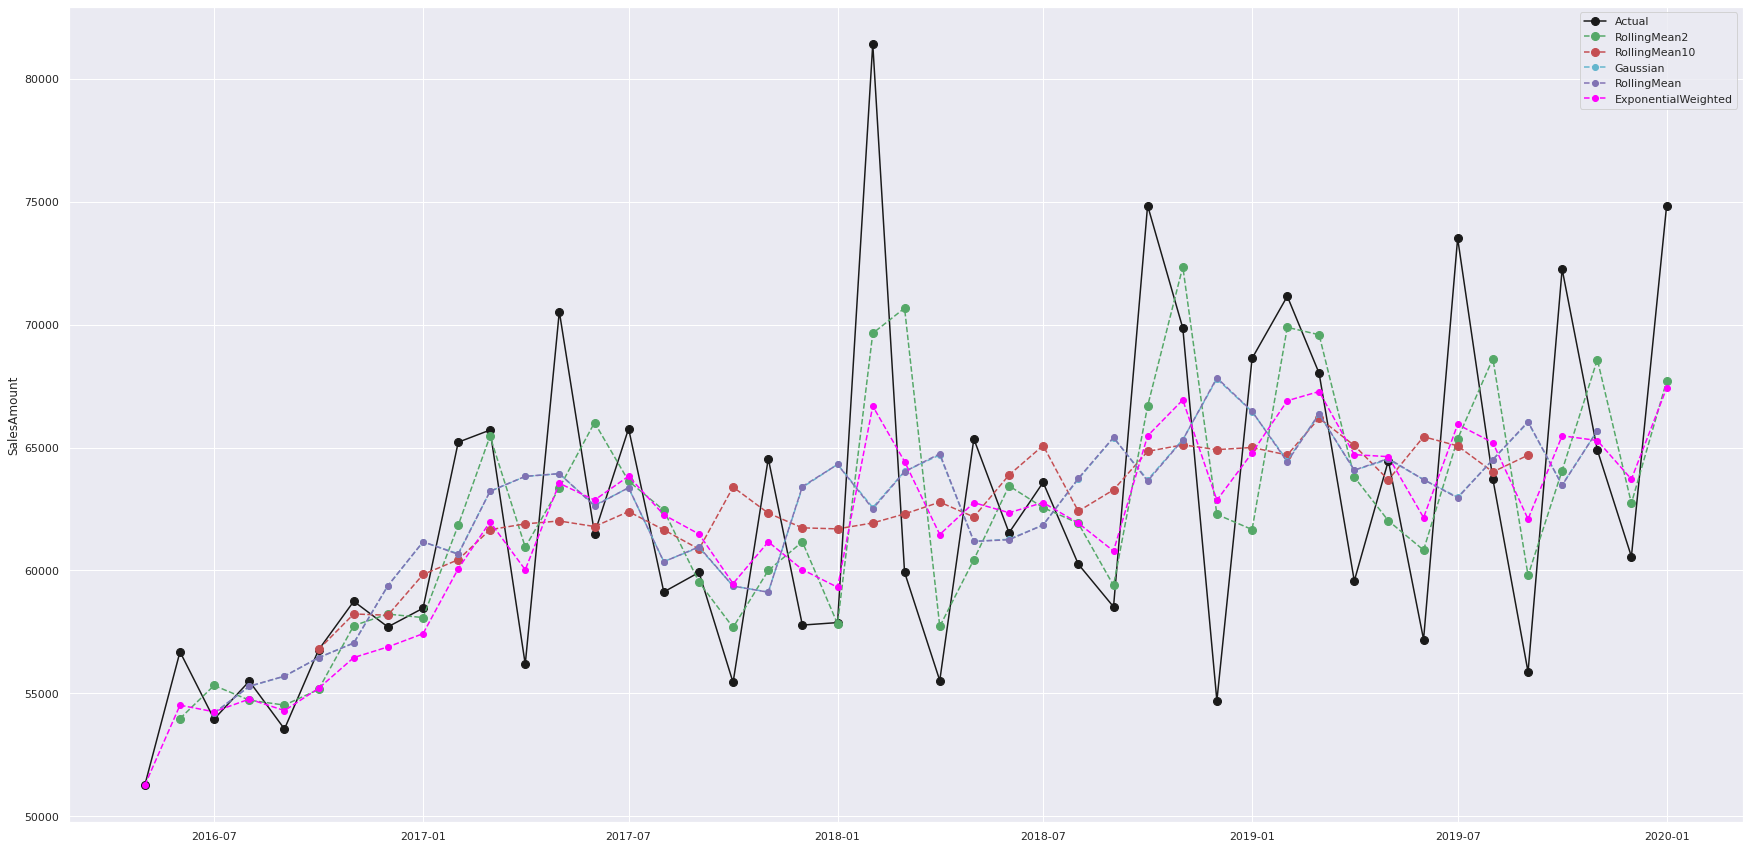

In [40]:
# Moving Average is doing the mathematical average of a rolling window of defined width. You should choose the window-width wisely, a large window-size will over-smooth the series. A window-size bigger than or equal to the 
# seasonal duration will effectively nullify the seasonal effect.
start, end = '2016-04-01', '2020-02-01'

fig, ax = plt.subplots(figsize=(30,15))

ax.plot(AnomalyTimeSeries.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Actual',color='k') 

ax.plot(AnomalyTimeSeries.rolling(window=2,center=True).mean().loc[start:end],
marker='o', markersize=8, linestyle='--', label='RollingMean2',color='g') 

ax.plot(AnomalyTimeSeries.rolling(window=10,center=True).mean().loc[start:end],
marker='o', markersize=8, linestyle='--', label='RollingMean10',color='r')

ax.plot(AnomalyTimeSeries.rolling(window=5, win_type='gaussian',center=True).mean(std=10).loc[start:end],
marker='o', linestyle='--', label='Gaussian',color='c')

ax.plot(AnomalyTimeSeries.rolling(window=5,center=True).mean().loc[start:end],
marker='o',  linestyle='--', label='RollingMean',color='m')

ax.plot(AnomalyTimeSeries.ewm(span=5).mean().loc[start:end],
marker='o', linestyle='--', label='ExponentialWeighted',color='magenta')

ax.set_ylabel('SalesAmount')
ax.legend();

In [41]:
AnomalyTimeSeries = AnomalyTimeSeries.reset_index().dropna() #reseting index, so we get back two columns again
AnomalyTimeSeries.columns = ['ds', 'y'] #we will use a Package called Prophet later on on this, which needs the input to be called ds for time and y for our SalesAmount
AnomalyTimeSeries.head()

ds      y
0 2016-05-01  51265
1 2016-06-01  56692
2 2016-07-01  53954
3 2016-08-01  55496
4 2016-09-01  53552

In [42]:
#Using Prophet to spot unusual datapoints: black dots are actual datapoints, blue line is predicted by Facebook`s Prophet, and blue shade represents 95% confidence interval: any black dotted actuals 
#outside the blue shade can be estimated as extraordinary values within this specific time series
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()
m = Prophet(seasonality_mode='additive',interval_width=0.95).fit(AnomalyTimeSeries) #additive vs multiplicative seasonality, 95% Konfidenzintervall
future = m.make_future_dataframe(periods=0, freq='MS')# replace 0 by eg 12, to make a prediction for the next 12 months; vs just periods=365 --> which works well for weekly and daily
fcst = m.predict(future)
fig = plot_plotly(m,fcst) 
#py.iplot(fig) #use this locally
#fig.show #or use this locally
fig.show(renderer="colab") #use this if you run it on Colab


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
# help(Prophet)

In [44]:
from fbprophet.plot import plot_plotly, plot_components_plotly
fig2=plot_components_plotly(m, fcst)
fig2.show(renderer="colab")

#in case you want to display the chart static
#fig2 = m.plot_components(fcst)

Most statistical models need the time series to be stationary, to be effective. A time series is said to be stationary if mean and variance are consistend over time. In other words, our SalesAmount is not dependent on time and do not show any trend or seasonal effects. Also covariance must be independent of time. We already saw that we have an upgoing trend, so it is not a stationary time series. Also our variance is changing, which is also violating against being stationary data (variance is changing is also called volatility). Even this is not stationary, we can still make different transformations to make our data stationary.

In [45]:
# Now we will use a statistic model to make inferences on our time series
from statsmodels.tsa.stattools import adfuller, kpss

# The null hypothesis in the Augmented Dickey-Fuller test (ADF) test tells us non-stationary. If p-value is less than the significance level
# (0.05) we will reject the null hypothesis (meaning the series has no unit root and is stationary). Unit root test uses an autoregressive model and optimizes across multiple different lag values, finally to determine how strong our time series is influenced by a trend.
result = adfuller(AnomalyTimeSeries['y'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')


# Null hypothesis of KPSS Test tells us that our time series is stationary.
stats, p, lags, critical_values = kpss(AnomalyTimeSeries['y'], 'ct')
print(f'KPSS Test Statistics: {stats}')
print(f'p-value: {p}')

if p<0.05:
      print('Series is not Stationary')
else:
      print('Series is Stationary')

ADF Statistic: -4.583215711105715
p-value: 0.0001386903323300616
Series is Stationary
KPSS Test Statistics: 0.1272560285196136
p-value: 0.08471105829701185
Series is Stationary


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'



In [46]:
# # We do not need to log our data, because it does seem to be stationary. In case it would not, we can log transform our data to make the distribution of our SalesAmount more linear
# from numpy import log
# # We use log if data has unequal variances.
# LogAnomalyTimeSeries = log(AnomalyTimeSeries['SalesAmount'])
# result = adfuller(LogAnomalyTimeSeries)
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])

Our SalesAmount is a time series, and therefore by definition ordered (by time/index). This sequence order can contain extra information for us. Do newer values have a stronger impact, or does last year's datapoint today's datapoint more strongly than yesterday's one etc(seasonal influence)?Autocorrelation can help us to determine, because it can help us discover patterns in our time series, successfully select the best modelling algorithm, correctly evaluate the effectiveness of our model. Specifically, autocorrelation and partial autocorrelation plots are heavily used to summarize the strength and relationship within observations in a time series with observations at prior time steps.
When there is a strong seasonal pattern, we can see in the ACF plot usually defined repeated spikes at the multiples of the seasonal window. For instance in most “monthly sales time series ” you should be able to see spikes at around at 12th, 24th, 36th.. lines explaining the rise of sales with the advent of Christmas holidays.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



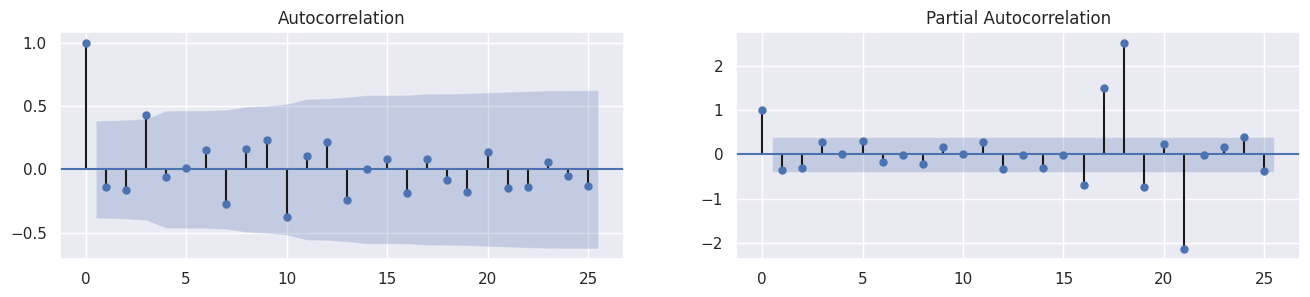

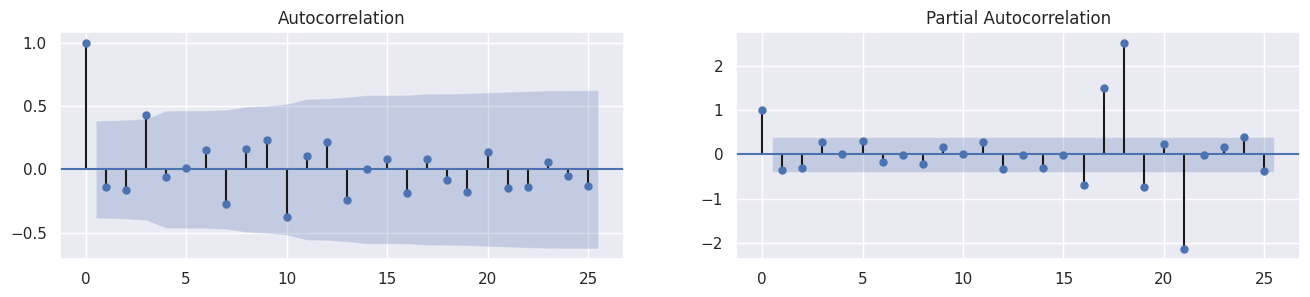

In [47]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

#We can calculate the correlation for time series observations with observations with previous time steps, called lags. 
#Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.
#The coefficient of correlation between two values in a time series is called the autocorrelation function (ACF), 
#and an ACF plot is a visual representation of correlations between different lags. 
# Calculate AutoCorrelation Function (ACF) and PACF upto 25 lags
acf_25 = acf(AnomalyTimeSeries['y'], nlags=25)
pacf_25 = pacf(AnomalyTimeSeries['y'], nlags=25)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(acf_25, lags=25, ax=axes[0])
plot_pacf(pacf_25, lags=25, ax=axes[1])

# the blue shaded horizontal cone represents the confidence level (here 95%). In other words, if the point is 
# outside the cone (on white) you may say that with 95% probability is has a certain impact on values. 
# If the bar is inside the cone (on blue) you may ignore this particular lag as most likely it is not relevant.
# The first bar is 1. This indexed 0 has always 1, since the first value always explains itself by 100%. 
# The second point is around -0.1 which means that the directly next value is described in -10% by the previous value.
# Eleventh bar has a height of appr -0.4. This means that current data will impact data in 11 months by -40%.
# A negative autocorrelation implies that if a past value is above average the newer value is more likely to be below average (vice versa).
# This means, if this month we observe > average(SalesAmount),  we might say that with 40% probability in 10 months we will gather less SalesAmount than on average.

ACF and PACF are able to pick out the number of autoregressor and moving average terms for making a model. These two terms come from the theory that the time series’s formula is made up of different parts of an autoregressor (next value somewhat based on previous) plus the moving average (the average of the noise in a model in a prior time and current time) plus the noise. A time series can have any number of these and so in order to reiterate, we look at the ACF and PACF plots.
Using autocorrelation we can find patterns in our sales data. And this statistical modelling technique is also building a bridge to our deep learning forecasting later on because we can build more efficient and less computational expensive models (you don't need this "trick" if your machine is sufficient enough) by ignoring values (creating smaller learning batches) that statistically do not have impact on data.

## Time Series Statistics

Last but least, we will have a look at our time series with a more statistical theoretical background. I believe that the above cells are most helpful to gather an understanding on our time series datapoints. But as an outlook, ARIMA will build the bridge trying to predict future sales as we will do in the chapter "Sales Prediction".

Level: The average value in the series.

Trend: check for any increasing or decreasing trend in the dataset.

Seasonality: Seasonality represents the repetition of a specific pattern in a seasonal manner (after some time periods).

Residual: The residual represents the remainder component. For many (but not all) time series models, the residuals are equal to the difference between the observations and the corresponding fitted values. Residuals are useful in checking whether a model has adequately captured the information in the data. A good forecasting method will yield residuals with the following properties:1. The residuals are uncorrelated. If there are correlations between residuals, then there is information left in the residuals which should be used in computing forecasts. 2. The residuals have zero mean. If the residuals have a mean other than zero, then the forecasts are biased.

Noise: The random variation in the series.

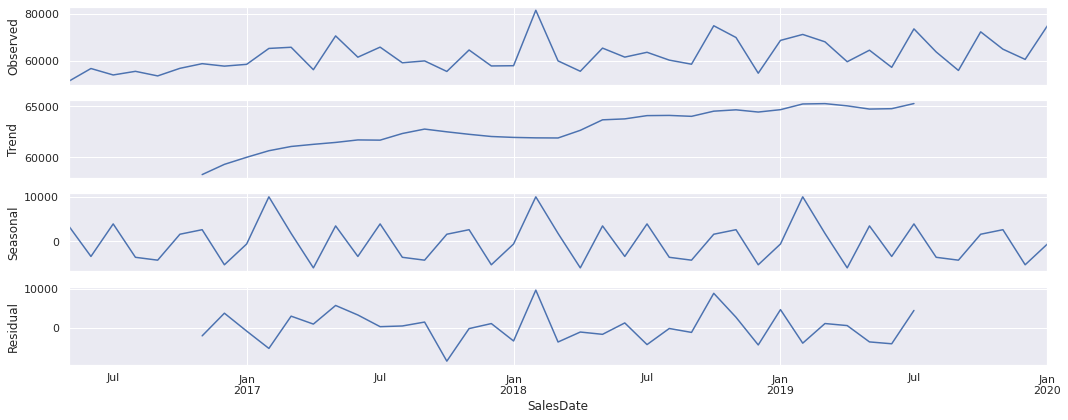

In [48]:
#Depending on the nature of the trend and seasonality, a time series can be modelled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.testing import assert_frame_equal

from pylab import rcParams
rcParams['figure.figsize'] = 15, 6

#Check for any outliers and decide if they should be included before training your model
# from Prophet we will move to the descriptive statistics of our time series using Statsmodels
df3=data.drop(columns=[ 'SalesValue','Customer','SalesTransactionID','SalesItem', 'Year','Month', 'Weekday','Quarter','Week'])
df3['SalesDate'] = pd.to_datetime(df3['SalesDate'])
df3 = df3.set_index('SalesDate')
daily_df = df3.resample('MS').sum()#D vs resample(ms); M monthhly vs D daily ws weekly w, M End of month, MS start of month


decomposition = sm.tsa.seasonal_decompose(daily_df, model='additive')#multiplicative cannot be used instead of additive anyway! #model='additive', extrapolate_trend='freq')
#An additive (model is made up of observed, trend, seasonal and residual (noise) components) model is linear where changes over time are consistently made by the same amount. A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).
fig = decomposition.plot()
plt.show()
#trend is associated with the slope (increasing/decreasing) of the time series
#seasonality which is the deviations from the mean caused by repeating short-term cycles and
#noise is the random variation in the series

In [49]:
# Extract the components: seasonality, trend, residual, actual values
DecompositionDetails = pd.concat([decomposition.seasonal, decomposition.trend, decomposition.resid, decomposition.observed], axis=1)

DecompositionDetails.columns = ['Seasonality', 'Trend', 'Residual', 'Actual_values']
DecompositionDetails.head()

Seasonality  Trend  Residual  Actual_values
SalesDate                                              
2016-05-01  3423.632523    NaN       NaN          51265
2016-06-01 -3408.561921    NaN       NaN          56692
2016-07-01  3869.771412    NaN       NaN          53954
2016-08-01 -3599.596644    NaN       NaN          55496
2016-09-01 -4241.429977    NaN       NaN          53552

Only systematic components (consistency) of our time series can be modeled. We try to model our time series with the four components above. We see an overall positive trend and a high seasonal peak during February. The residuals are also interesting, showing periods of higher variability during September to November 2017 and January to March 2018 as well as September to November 2018.

In [50]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import scipy as sp

# Let's create the Autoregressive Integrated Moving Average (ARIMA) model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(np.log(daily_df['SalesAmount']), order = (1,1,1)).fit()
model.summary()
# We are not giving in the logarithmic data, because our SalesAmount seems to be stationary. Two cells below we will find the best order parameters (p,d,q) representing how many terms of AR, periods, and terms MA respectively.
# We can see the AR and MA terms near the bottom of the results have the P > |z| of 0.000 meaning it is significant.
# We can try other order terms and compare different models by looking at the AIC and/or BIC like how we do with other models.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.SalesAmount   No. Observations:                   44
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  40.870
Method:                       css-mle   S.D. of innovations              0.091
Date:                Sat, 05 Dec 2020   AIC                            -73.739
Time:                        19:30:35   BIC                            -66.603
Sample:                    06-01-2016   HQIC                           -71.093
                         - 01-01-2020                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0037      0.001      4.111      0.000       0.002       0.005
ar.L1.D.SalesAmount    -0.1762      0.153     -1.155      0.255      -0.475       0.123
ma.L1.D.SalesAmount    -1.0000      0.081    -12.387      0.000      -1.158      -0.842
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.6766           +0.0000j            5.6766            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [51]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
# Let's create the Seasonal Autoregressive Integrated Moving Average (SARIMA) model, because our model needs to take seasonality into account
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(daily_df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

# There are three trend elements that require configuration:
# p: Trend autoregression order.
# d: Trend difference order.
# q: Trend moving average order.

# There are four seasonal elements that are not part of ARIMA that must be configured; they are:
# P: Seasonal autoregressive order.
# D: Seasonal difference order.
# Q: Seasonal moving average order.
# m: The number of time steps for a single seasonal period.

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1099.163998928554
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:45025.33237514954
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:658.9026779112539
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:683.7258073082882
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:662.9333288270068
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:432.4745945740263
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1047.1741614357848
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:38630.565013233136
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:640.8326801685488
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:796.8097653935766
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:750.8358712820558
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:434.5270386318547
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:909.4243332384875
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1398.2823788549822
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:662.6220300537112
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:679.306260212363
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:661.9260400396237
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:423.7388715653454
ARIMA(0,

In [52]:
#import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(daily_df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12), 
                                # P = 1 which means making use of the first seasonally offset observation in the model
                                # D = 1 which means a first order seasonal difference is calculated
                                # Q = 0 uses a first order errors in the model (e.g. moving average).
                                # m = 12, which suggests our monthly sales have a yearly seasonal cycle. m parameter influences the P, D, and Q parameters as well. 
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2212      0.570     -0.388      0.698      -1.338       0.896
ma.L1         -0.7108      0.236     -3.010      0.003      -1.174      -0.248
ar.S.L12      -0.2525      0.322     -0.785      0.432      -0.883       0.378
sigma2      5.999e+07   3.79e-10   1.58e+17      0.000       6e+07       6e+07


In [53]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                        SalesAmount   No. Observations:                   45
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -195.074
Date:                            Sat, 05 Dec 2020   AIC                            398.149
Time:                                    19:30:38   BIC                            401.927
Sample:                                05-01-2016   HQIC                           398.788
                                     - 01-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2212      0.570     -0.388      0.698      -1.338       0.896
ma.L1         -0.7108      0.236     -3.010      0.003      -1.174      -0.248
ar.S.L12      -0.2525      0.322     -0.785      0.432      -0.883       0.378
sigma2      5.999e+07   3.79e-10   1.58e+17      0.000       6e+07       6e+07
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.84
Prob(Q):                               nan   Prob(JB):                         0.66
Heteroskedasticity (H):               0.35   Skew:                             0.47
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.33e+33. Standard errors may be unstable.
"""

The coefficients (coef) column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Only ma.L1 and sigma2 weights have a p-value lower or close to 0.05, so it is reasonable to retain only these in our model.

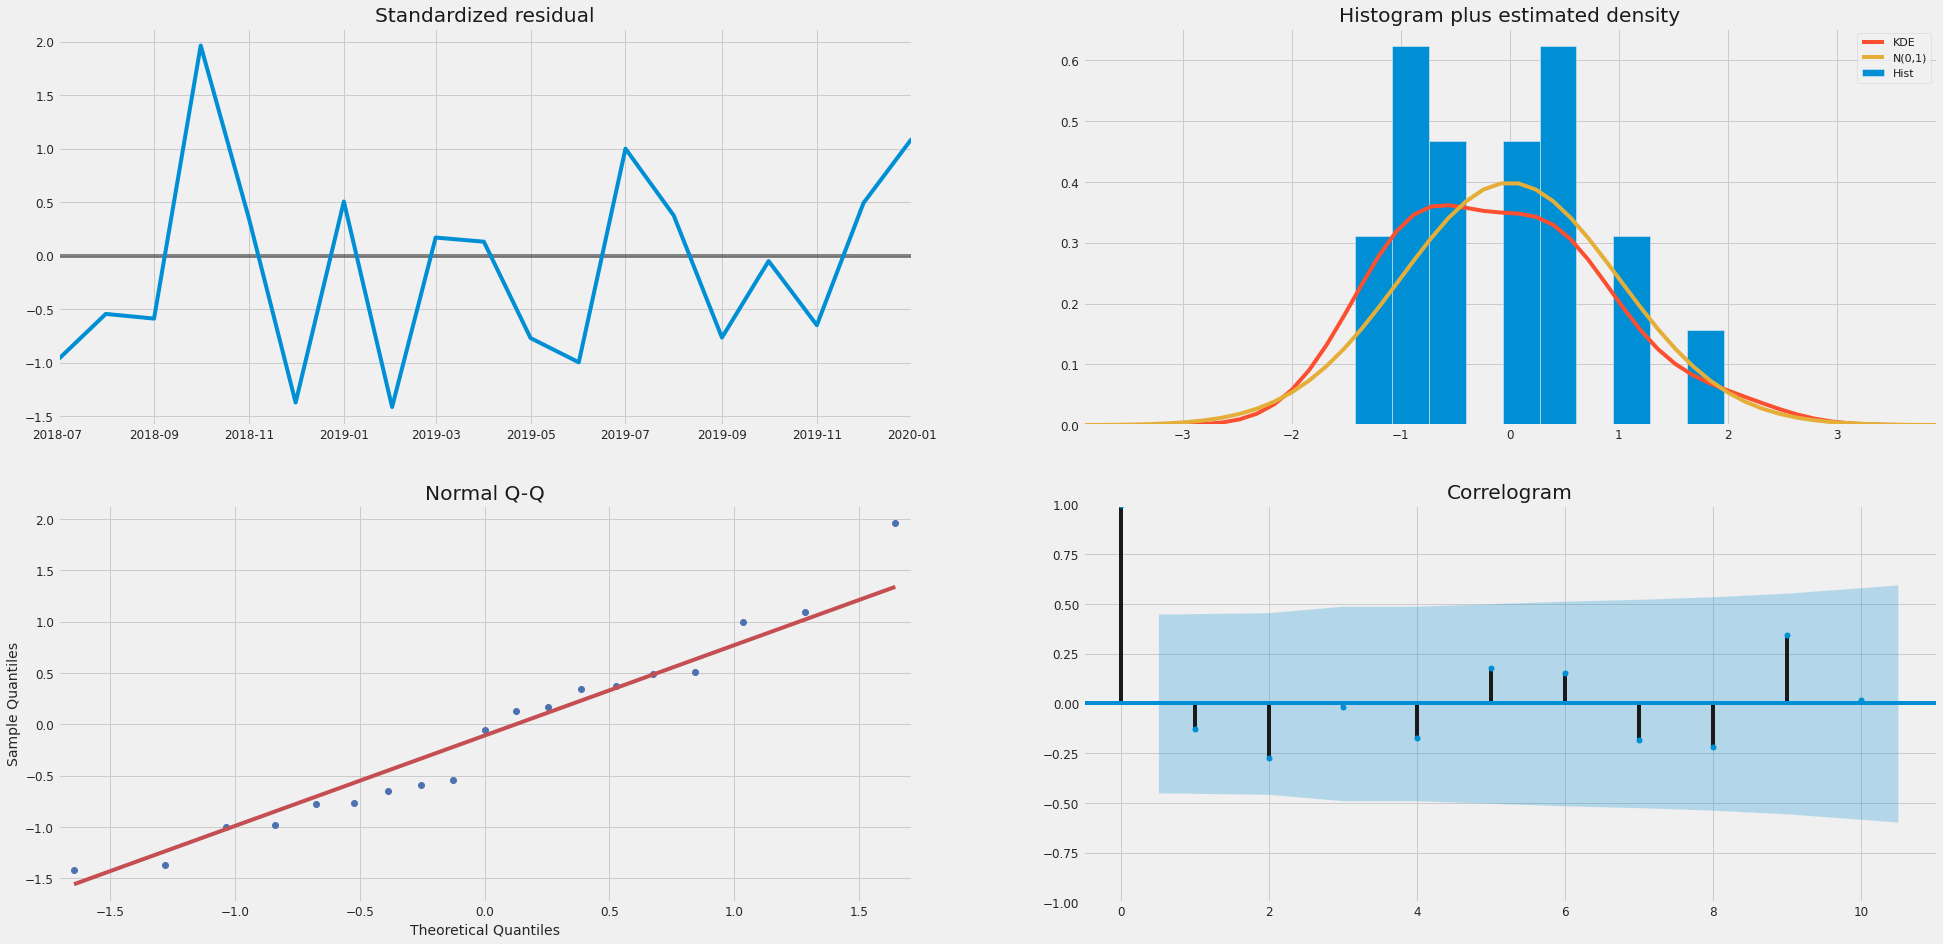

In [54]:
results.plot_diagnostics(figsize=(30, 15))
plt.show()

The residual errors does not seem to fluctuate around a mean of zero and therefore do not have a uniform variance.Residual indeed is the difference between true and predicted value. the residuals of our model should be uncorrelated and normally distributed with a zero mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved. If there are correlations between residuals - there is information left in the residuals which should be used in computing forecasts. If the residuals have a mean other than zero, then the forecasts are biased (meaning that our model does not fully depict the process).
In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.
The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
The residuals over time (top left plot) don’t display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.
Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.
The density plot in the top right suggest normal distribution with mean zero.
Most the dots in the bottom left does not fall in line with the red line. This implies that the distribution is skewed, as we just made aware using skew function.
The Correlogram in the bottom right, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

In [55]:
# We have set up our ARIMA statistical model to finally forecast values. In case we would have transformationed our data
# now we would have to transform it back. But because we haven't used the logarithmic scaling, we do not need to
#  difference our SalesAmount back. The ARIMA method would take care of the differencing so we can simply take the exponential of our forecast data.

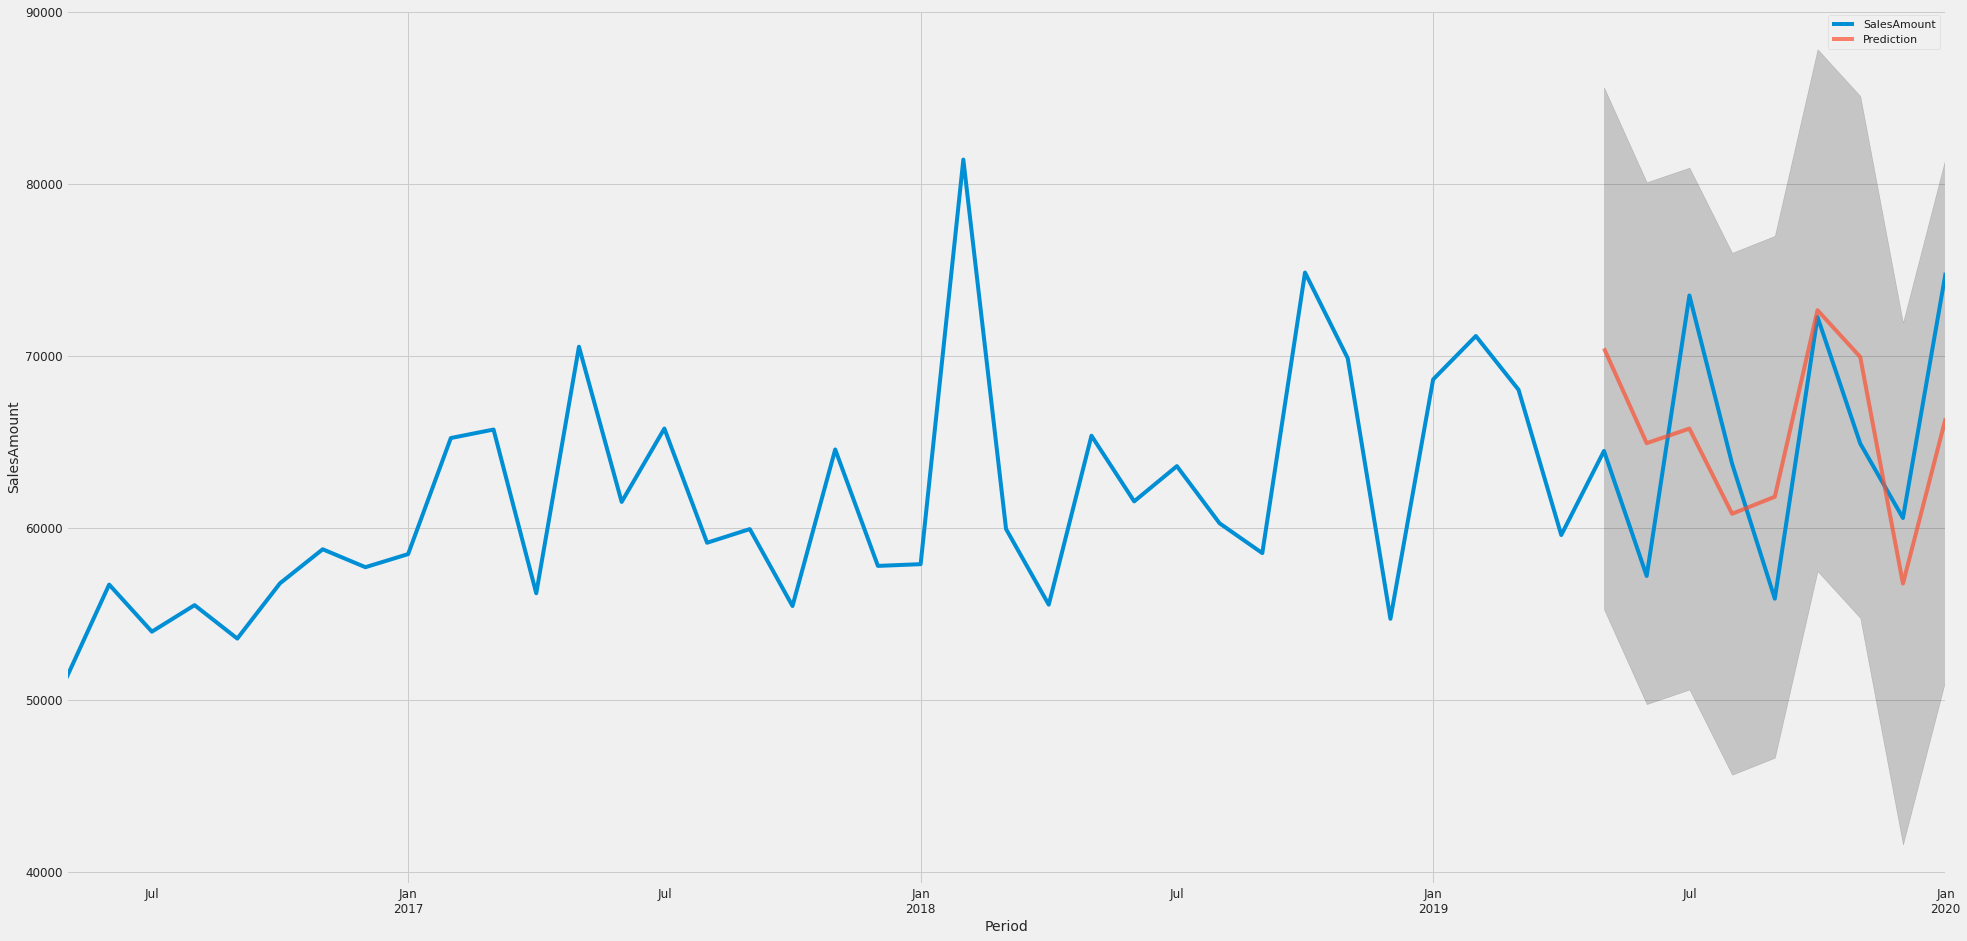

In [56]:
pred = results.get_prediction(start=pd.to_datetime('2019-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = daily_df['2016':].plot(label='Actual')
pred.predicted_mean.plot(ax=ax, label='Prediction', alpha=.7, figsize=(30, 15))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Period')
ax.set_ylabel('SalesAmount')
plt.legend()
plt.show()